In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.metrics import accuracy_score,cohen_kappa_score

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
train=pd.read_csv("C://Users//abhis//Downloads//Train_UWu5bXk.csv")
test=pd.read_csv("C://Users//abhis//Downloads//Test_u94Q5KV.csv")

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
type(train)

pandas.core.frame.DataFrame

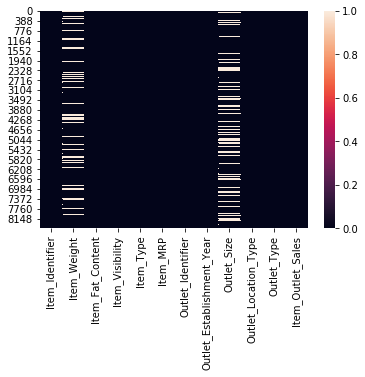

In [12]:
sns.heatmap(train.isnull())

In [13]:
s=[]
for i in train.columns:
    if np.dtype(train[i]).name=='object':
        s.append(i)

In [14]:
s

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
train.isnull().sum()[train.isnull().sum()>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [15]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [16]:
#here we have only two LF and regular! 
train.groupby(["Item_Fat_Content","Item_Type"])["Item_MRP"].mean()

Item_Fat_Content  Item_Type            
LF                Baking Goods             115.641430
                  Breads                   120.514400
                  Breakfast                138.536400
                  Canned                   123.988176
                  Dairy                    131.105367
                  Frozen Foods             161.783300
                  Fruits and Vegetables    141.536513
                  Hard Drinks              136.909400
                  Health and Hygiene       135.490897
                  Household                145.847774
                  Meat                     119.331880
                  Others                   143.399618
                  Seafood                  103.856900
                  Snack Foods              147.262510
                  Soft Drinks              139.496850
                  Starchy Foods            156.902489
Low Fat           Baking Goods             121.286145
                  Breads                  

In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

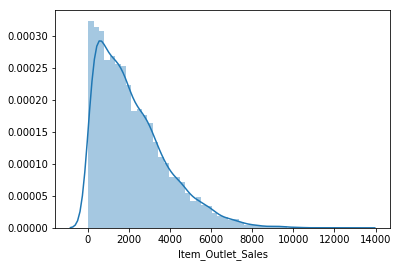

In [9]:
# target var outlet sales
sns.distplot(train.Item_Outlet_Sales)

In [10]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [13]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

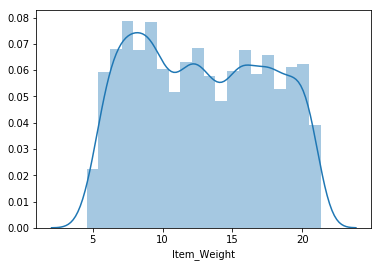

In [14]:
sns.distplot(train.Item_Weight.dropna())

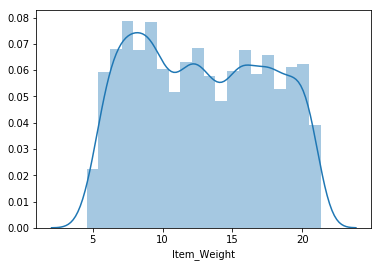

In [16]:
sns.distplot(train[a]["Item_Weight"])

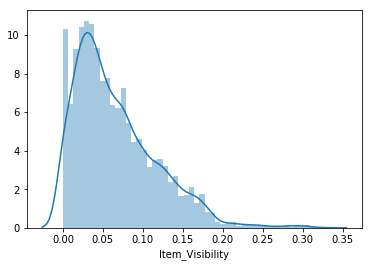

In [30]:
#item visibility is 0 and still it is being sold !Well its not possible.
sns.distplot(train.Item_Visibility)

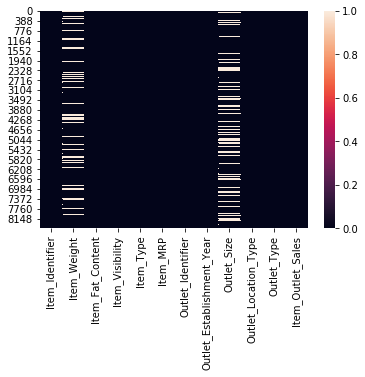

In [31]:
sns.heatmap(train.isnull())

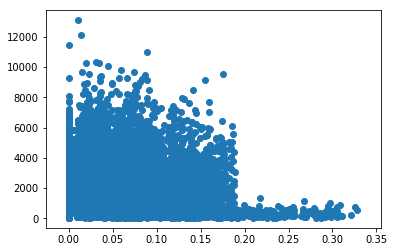

In [32]:
#visibilty is not there then how it is selling product worth of sum rs
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales)

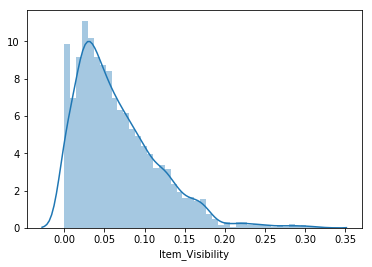

In [33]:
sns.distplot(test.Item_Visibility)

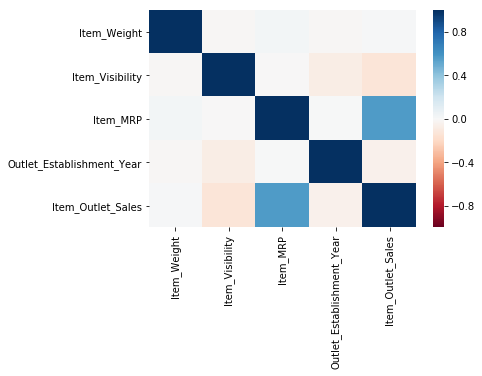

In [19]:
sns.heatmap(train.corr(),vmax=1,vmin=-1,cmap="RdBu")

In [36]:
np.corrcoef(train.Item_MRP,train.Item_Outlet_Sales)

array([[1.        , 0.56757445],
       [0.56757445, 1.        ]])

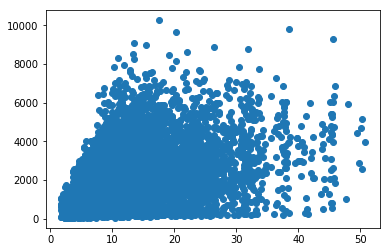

In [20]:
plt.scatter(train.Item_MRP/train.Item_Weight,train.Item_Outlet_Sales)

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#craeting a new variable called price per unit

In [21]:
train["price per unit"]=train.Item_MRP/train.Item_Weight

In [41]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581


In [22]:
test["price per unit"]=train.Item_MRP/train.Item_Weight

In [43]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,price per unit
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,26.861204
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,8.153581
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,8.092457
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,9.484115
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6.031512


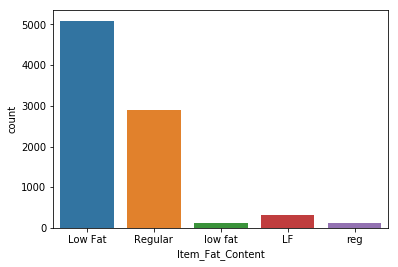

In [23]:
sns.countplot(train.Item_Fat_Content)

In [45]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
train2=train

In [25]:
train2["Item_Fat_Content"].replace(["LF","reg","Low Fat","low fat",],["low Fat","Regular","low Fat","low Fat"],inplace=True)

In [56]:
type(train2)

pandas.core.frame.DataFrame

In [26]:
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit
0,FDA15,9.30,low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


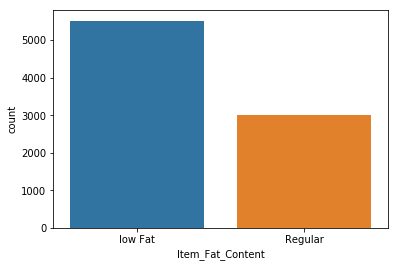

In [27]:
sns.countplot(train2.Item_Fat_Content)

In [28]:
test2=test

In [29]:
test2["Item_Fat_Content"].replace(["LF","reg","Low Fat","low fat",],["low Fat","Regular","low Fat","low Fat"],inplace=True)

In [30]:
test2.Item_Fat_Content.value_counts()

low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

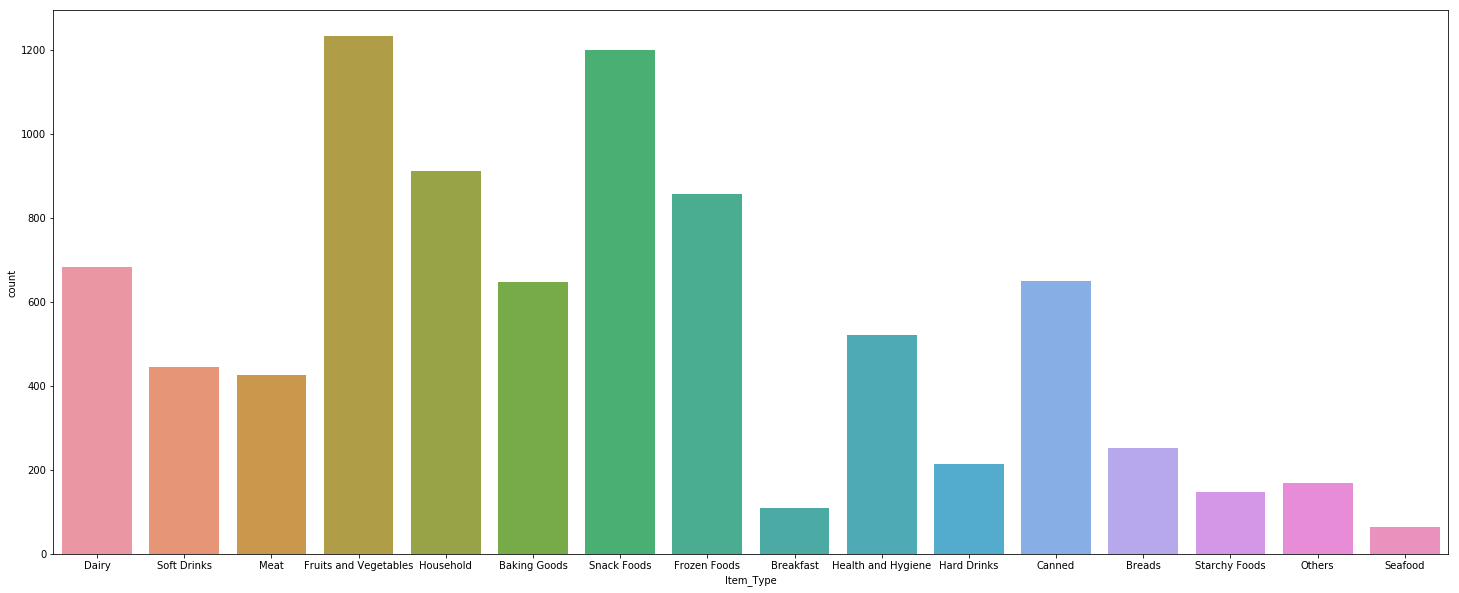

In [31]:
plt.figure(figsize=[25,10])
sns.countplot(train2.Item_Type)

In [67]:
train2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit
0,FDA15,9.30,low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581


In [68]:
train2.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [72]:
train2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'price per unit'],
      dtype='object')

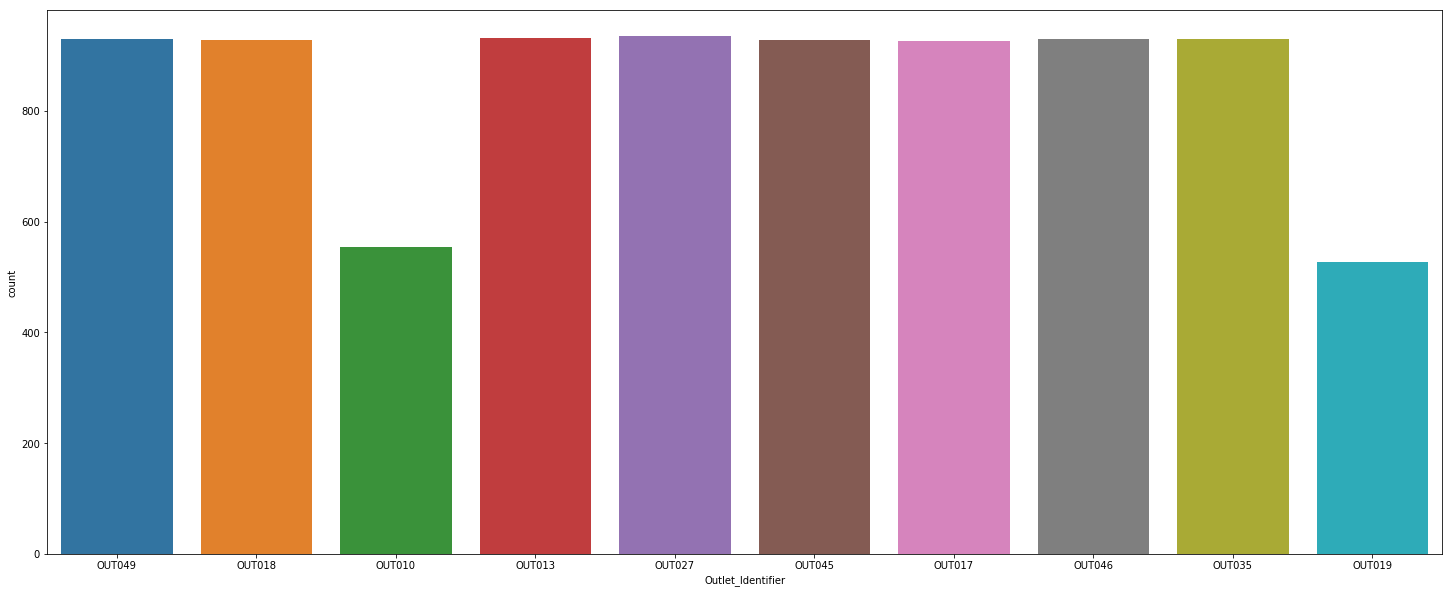

In [32]:
plt.figure(figsize=[25,10])
sns.countplot(train2.Outlet_Identifier)

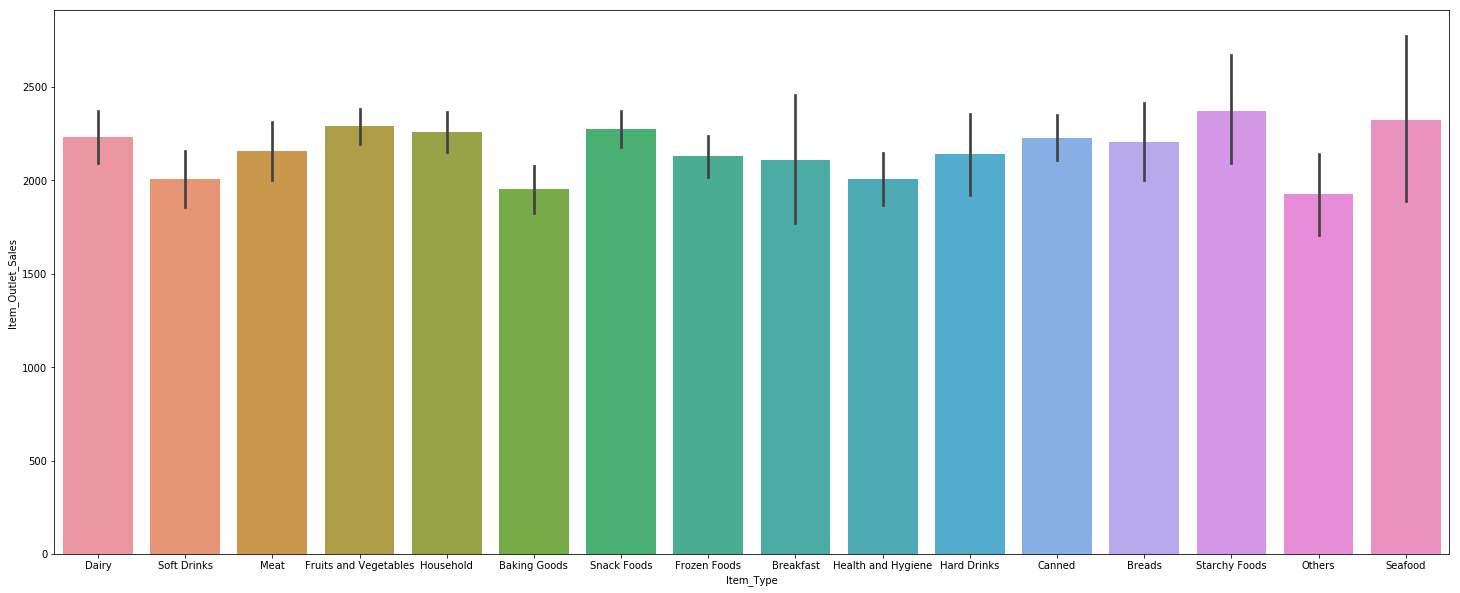

In [33]:
plt.figure(figsize=[25,10])
sns.barplot(train2.Item_Type,train2.Item_Outlet_Sales)

In [34]:
#missing values
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [35]:
train2.Item_Weight=train2.Item_Weight.fillna(12.6)

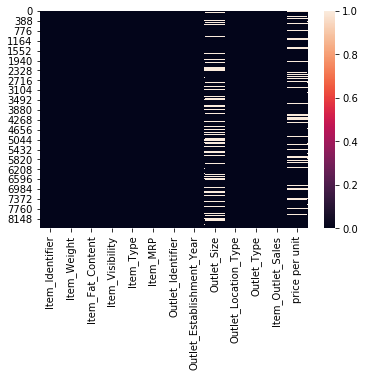

In [36]:
sns.heatmap(train2.isnull())

In [37]:
test2.Item_Weight=test2.Item_Weight.fillna(12.6)

In [83]:
#transform functions groupby the item id and put the values into the missing data.
newtrain=train2.groupby("Item_Identifier").transform(lambda x: x.fillna(x.notnull().mean()))

In [84]:
newtrain.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit
0,9.30,low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,17.50,low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0.666667,Tier 3,Grocery Store,732.3800,9.484115
4,8.93,low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [85]:
newtrain.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
price per unit               0
dtype: int64

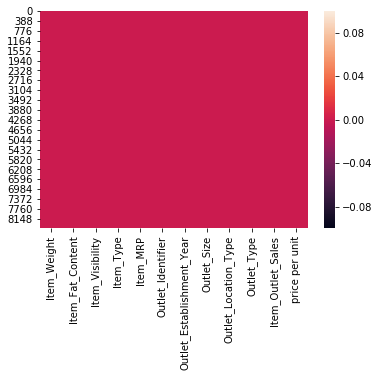

In [86]:
sns.heatmap(newtrain.isnull())

In [87]:
newtrain.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'price per unit'],
      dtype='object')

In [88]:
train2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'price per unit'],
      dtype='object')

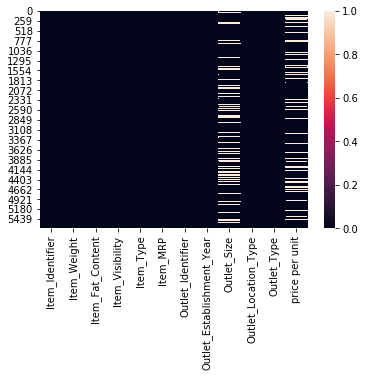

In [89]:
sns.heatmap(test2.isnull())

In [90]:
train2.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [99]:
test2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
price per unit                944
dtype: int64

In [100]:
test2=test2.drop("price per unit",axis=1)

In [101]:
test2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [102]:
test2["price per unit"]=test2.Item_MRP/test2.Item_Weight

In [103]:
test2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
price per unit                  0
dtype: int64

In [105]:
test2.Outlet_Size=test2.Outlet_Size.fillna("Medium")

In [106]:
test2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
price per unit               0
dtype: int64

In [107]:
test2.Outlet_Size.value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [108]:
train2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
price per unit               0
dtype: int64

In [109]:
test2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
price per unit               0
dtype: int64

In [110]:
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit
0,FDA15,9.30,low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [112]:
#item visibility
train2.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [113]:
train2.Item_Visibility.replace(to_replace=0,value=0.053,inplace=True)

In [115]:
test2.Item_Visibility.replace(to_replace=0,value=0.054,inplace=True)

In [116]:
test2.Item_Visibility.describe()

count    5681.000000
mean        0.069039
std         0.048538
min         0.003591
25%         0.033208
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [117]:
train2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
price per unit               0
dtype: int64

In [118]:
test2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
price per unit               0
dtype: int64

In [122]:
train2.tail(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit
8503,FDQ44,20.500,low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168,5.862224
8504,NCN18,12.600,low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128,8.869397
8505,FDB46,10.500,Regular,0.094146,Snack Foods,210.8244,OUT018,2009,Medium,Tier 3,Supermarket Type2,2117.2440,20.078514
8506,DRF37,17.250,low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650,15.257449
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950,17.312755
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Medium,Tier 2,Supermarket Type1,2587.9646,17.574819
8509,FDG45,8.100,low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,Medium,Tier 3,Grocery Store,424.7804,26.418543
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504,16.782493
8511,FDF05,17.500,low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560,15.005200
8512,FDR26,20.700,low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392,8.613662


# Feature engineering
1-price per unit
2-

In [130]:
#we can extract first two letter of id which have significant relation with Type
train2.Item_Identifier[4][0:2]

'NC'

In [144]:
itemid=[]
for i in range(0,8523):
    itemid.append(train2.Item_Identifier[i][0:2])

In [143]:
train2.shape

(8523, 14)

In [133]:
type(itemid)

list

In [145]:
train2["item_id"]=pd.Series(itemid)

In [146]:
train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit,item_id
0,FDA15,9.300,low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,FDN15,17.500,low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,FDX07,19.200,Regular,0.053000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,FD
4,NCD19,8.930,low Fat,0.053000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC
5,FDP36,10.395,Regular,0.053000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4.944762,FD
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,4.224088,FD
7,FDP10,12.600,low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,8.552556,FD
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,5.985963,FD
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,9.782365,FD


In [138]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [147]:
newtrain=train2.drop("Item_Outlet_Sales",axis=1)

In [149]:
newtrain=newtrain.drop(["Outlet_Establishment_Year","Item_Identifier"],axis=1)

In [150]:
newtrain=pd.get_dummies(newtrain)

In [151]:
newtrain.shape

(8523, 45)

In [159]:
sc=StandardScaler()
scaled_train=sc.fit_transform(newtrain)


C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [164]:
scaled_train=pd.DataFrame(scaled_train,columns=newtrain.columns)

In [167]:
scaled_train

,Item_Weight,Item_Visibility,Item_MRP,price per unit,Item_Fat_Content_Regular,Item_Fat_Content_low Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_id_DR,item_id_FD,item_id_NC
0,-0.831187,-1.090924,1.747454,1.897563,-0.738147,0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.630810,-1.024864,-1.489023,-0.567860,1.354743,-1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.108727,-1.076350,0.010040,-0.575915,-0.738147,0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.510904,-0.335379,0.660050,-0.392513,1.354743,-1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.918719,-0.335379,-1.399220,-0.847521,-0.738147,0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
5,-0.572137,-0.335379,-1.438734,-0.990741,1.354743,-1.354743,3.486083,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558
6,0.197914,-1.158524,-1.338238,-1.085716,1.354743,-1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
7,-0.050490,1.187252,-0.533641,-0.515280,-0.738147,0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,-0.349551,2.848773,-0.321627,0.625708,-0.480558
8,0.801180,-1.077842,-0.706908,-0.853524,1.354743,-1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
9,1.510904,0.512111,0.752008,-0.353207,1.354743,-1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558


In [168]:
scaledtrain.columns

NameError: name 'scaledtrain' is not defined

In [171]:
train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price per unit,item_id
0,FDA15,9.300,low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,FDN15,17.500,low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,FDX07,19.200,Regular,0.053000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,FD
4,NCD19,8.930,low Fat,0.053000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC
5,FDP36,10.395,Regular,0.053000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4.944762,FD
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,4.224088,FD
7,FDP10,12.600,low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,8.552556,FD
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,5.985963,FD
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,9.782365,FD


In [173]:
newtrain=train2.drop(["Outlet_Establishment_Year","Item_Identifier"],axis=1)

In [174]:
newtrain=pd.get_dummies(newtrain)

In [175]:
newtrain.shape

(8523, 46)

In [177]:
scaled_train=sc.fit_transform(newtrain)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [183]:
scaled_train=pd.DataFrame(scaled_train,columns=newtrain.columns)

In [190]:
scaled_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'price per unit', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low Fat', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Ty

In [180]:
newtest=test2.drop(["Outlet_Establishment_Year","Item_Identifier"],axis=1)

In [181]:
newtest=pd.get_dummies(newtest)

In [182]:
newtest.sh

(5681, 45)

In [186]:
scaled_test=pd.DataFrame(scaled_test,columns=newtest.columns)

In [185]:
scaled_test=sc.fit_transform(newtest)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [198]:
x=scaled_train.drop("Item_Outlet_Sales",axis=1)
y=scaled_train.Item_Outlet_Sales


In [203]:
tr=DecisionTreeRegressor()


In [204]:
tr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [205]:
pred=tr.predict(scaled_test)

In [206]:
saveit=sc.fit_transform(pd.DataFrame(train2.Item_Outlet_Sales))

In [207]:
sales_pred=sc.inverse_transform(pred)

In [208]:
sales_pred

array([2404.2038,  959.4178, 1775.6886, ..., 2105.2596, 7247.233 ,
        856.8846])

In [210]:
solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": sales_pred})

In [213]:
solution.to_csv("Prediction.csv",index=False)

In [212]:
cd

C:\Users\abhis
